In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os
import random
########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 6 # the lower limit of qubits for the circuit
steps= 1 #jump in qubit numbers
name_of_algo='bitcode'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague,
 qiskit.providers.fake_provider.backends.mumbai.fake_mumbai.FakeMumbaiV2,
 qiskit.providers.fake_provider.backends.lima.fake_lima.FakeLimaV2,
 qiskit.providers.fake_provider.backends.manila.fake_manila.FakeManilaV2,
 qiskit.providers.fake_provider.backends.london.fake_london.FakeLondonV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    rand_list=[]
    for j in range(i):       
        rand_list.append(random.randint(0,1))
    print("i=",i,"i-1=",i-1,"rand_list=",rand_list)
    
    benchmarks.append((supermarq.bit_code.BitCode(i,i-1,rand_list),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

i= 3 i-1= 2 rand_list= [0, 0, 1]
i= 4 i-1= 3 rand_list= [1, 0, 1, 0]
i= 5 i-1= 4 rand_list= [0, 0, 0, 0, 1]
-------------------------- bitcode3 ---------------------------
                                               ┌─┐                      
         q_0: ──■─────────────────■────────────┤M├──────────────────────
              ┌─┴─┐┌───┐┌─┐     ┌─┴─┐     ┌───┐└╥┘┌─┐             ┌─┐   
         q_1: ┤ X ├┤ X ├┤M├─|0>─┤ X ├─────┤ X ├─╫─┤M├─|0>─────────┤M├───
              └───┘└─┬─┘└╥┘     └───┘     └─┬─┘ ║ └╥┘     ┌─┐     └╥┘   
         q_2: ──■────■───╫─────────────■────■───╫──╫──────┤M├──────╫────
              ┌─┴─┐┌───┐ ║  ┌─┐      ┌─┴─┐┌───┐ ║  ║  ┌─┐ └╥┘      ║ ┌─┐
         q_3: ┤ X ├┤ X ├─╫──┤M├──|0>─┤ X ├┤ X ├─╫──╫──┤M├──╫──|0>──╫─┤M├
              ├───┤└─┬─┘ ║  └╥┘      └───┘└─┬─┘ ║  ║  └╥┘  ║  ┌─┐  ║ └╥┘
         q_4: ┤ X ├──■───╫───╫──────────────■───╫──╫───╫───╫──┤M├──╫──╫─
              └───┘      ║   ║                  ║  ║   ║   ║  └╥┘  ║  ║ 
    m_mcm0: 2/═══════════

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.375, 0.8888888888888888, 0.6666666666666666, 0.25, 0.0], 'bitcode4': [0.2857142857142857, 0.3333333333333333, 0.9, 0.6428571428571429, 0.23076923076923078, 0.07142857142857144], 'bitcode5': [0.2222222222222222, 0.21875, 0.9696969696969697, 0.6928104575163399, 0.25, 0.11764705882352941]}


In [14]:
%%timeit
import time
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            total_time=time.time()-start
            print("Iteration Number:", i,"\nTime_Taken (in seconds):  ", total_time,"\n")
            result=job.result()  
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," --> score :: ",score,"           SD :: ",sd,"  time_taken(in seconds)= ",job.result(0).time_taken)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_prague
Iteration Number: 0 
Time_Taken (in seconds):   0.3587973117828369 

Iteration Number: 1 
Time_Taken (in seconds):   0.3603219985961914 

Iteration Number: 2 
Time_Taken (in seconds):   0.376584529876709 

Iteration Number: 3 
Time_Taken (in seconds):   0.35663843154907227 

Iteration Number: 4 
Time_Taken (in seconds):   0.36429619789123535 

bitcode3  --> score ::  0.0            SD ::  0.0   time_taken(in seconds)=  0.13432621955871582
Iteration Number: 0 
Time_Taken (in seconds):   0.36177539825439453 

Iteration Number: 1 
Time_Taken (in seconds):   0.3718254566192627 

Iteration Number: 2 
Time_Taken (in seconds):   0.3648054599761963 

Iteration Number: 3 
Time_Taken (in seconds):   0.36606526374816895 

Iteration Number: 4 
Time_Taken (in seconds):   0.364577054977417 

bitcode4  --> score ::  0.0            SD ::  0.0   time_taken(in seconds)=  0.13138127326965332
Iteratio

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   

USED BACKEND:: fake_prague ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


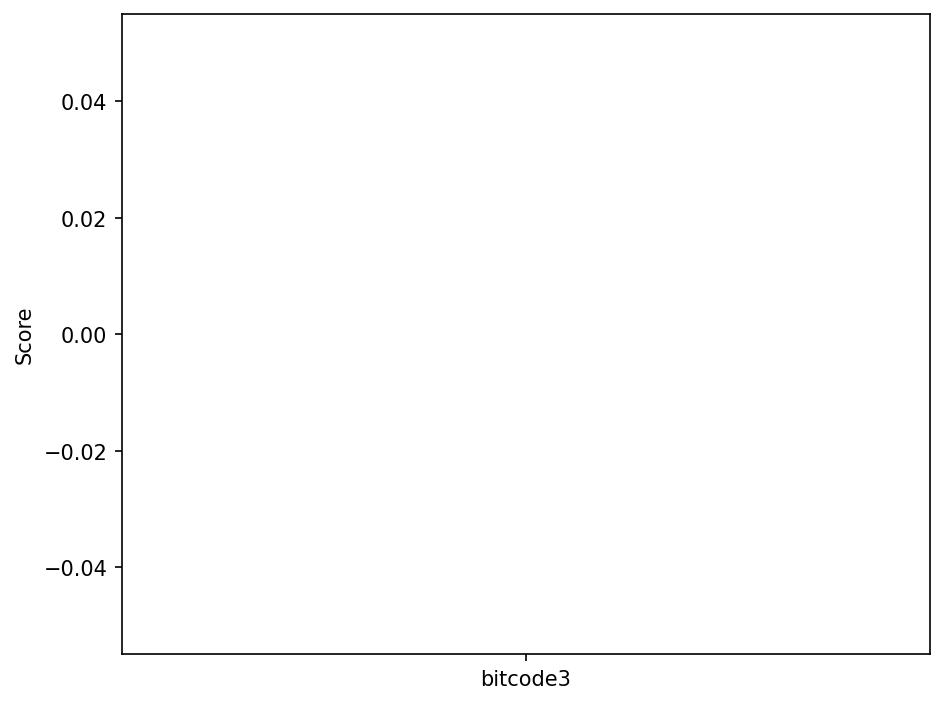

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


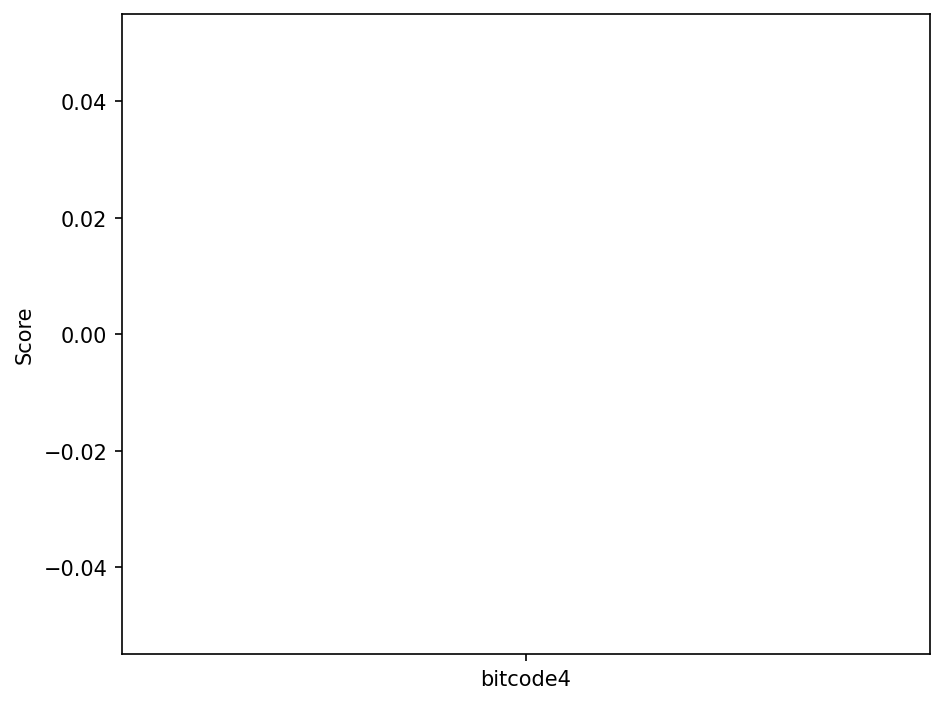

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


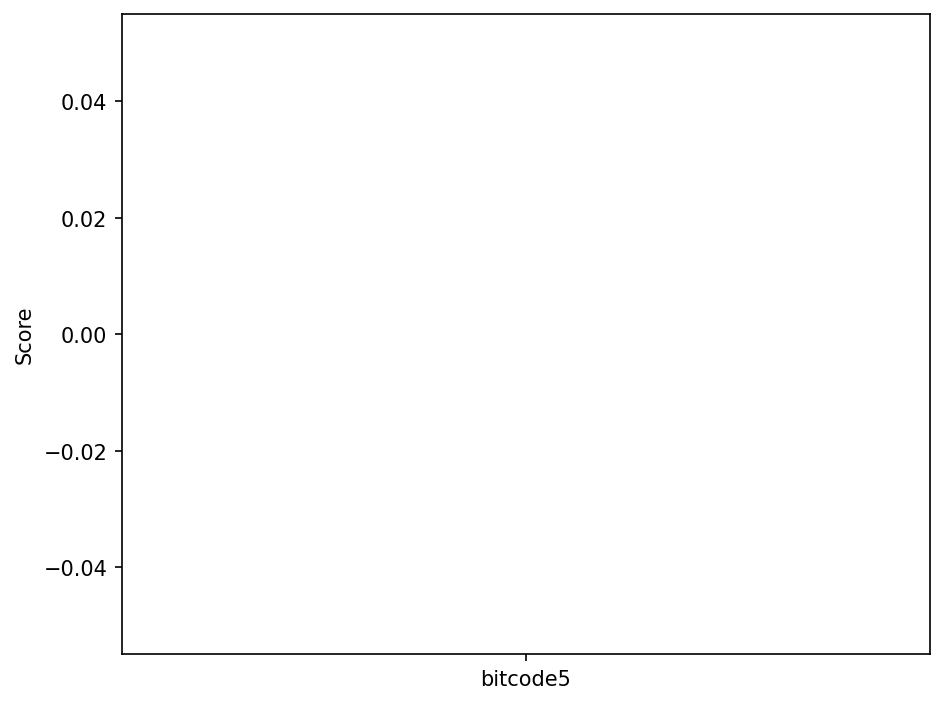

-----------------------------------------------------------
USED BACKEND:: fake_mumbai ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


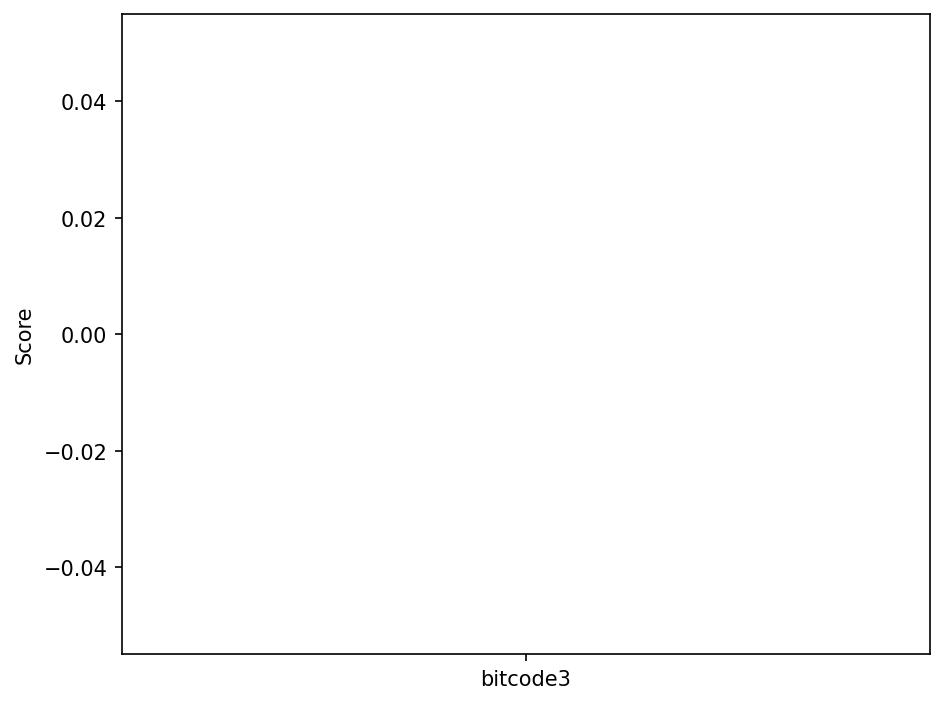

-----------------------------------------------------------
USED BACKEND:: fake_mumbai ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


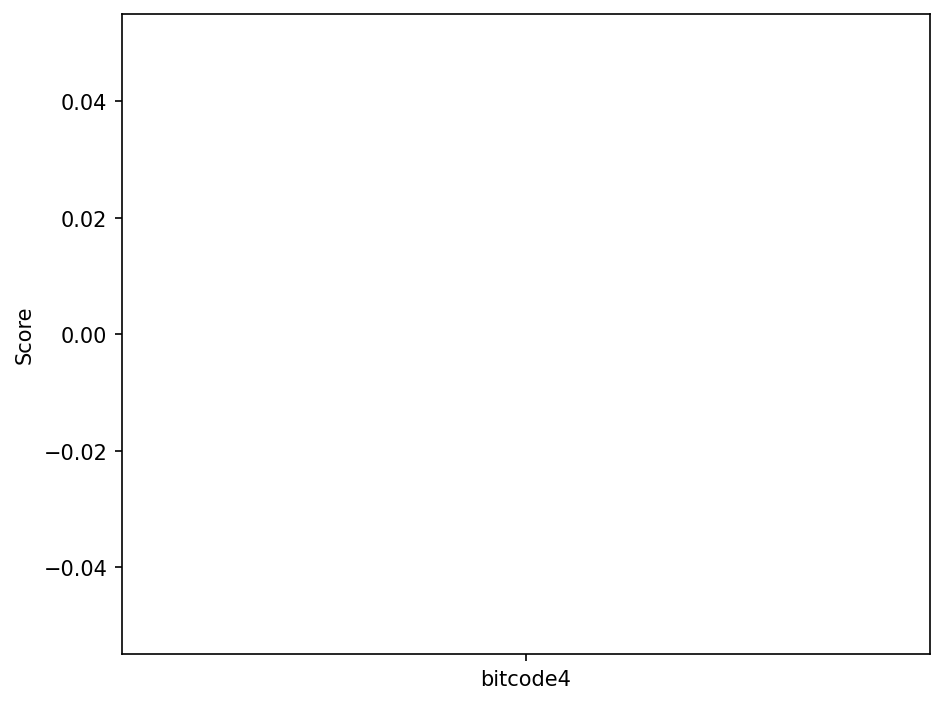

-----------------------------------------------------------
USED BACKEND:: fake_mumbai ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


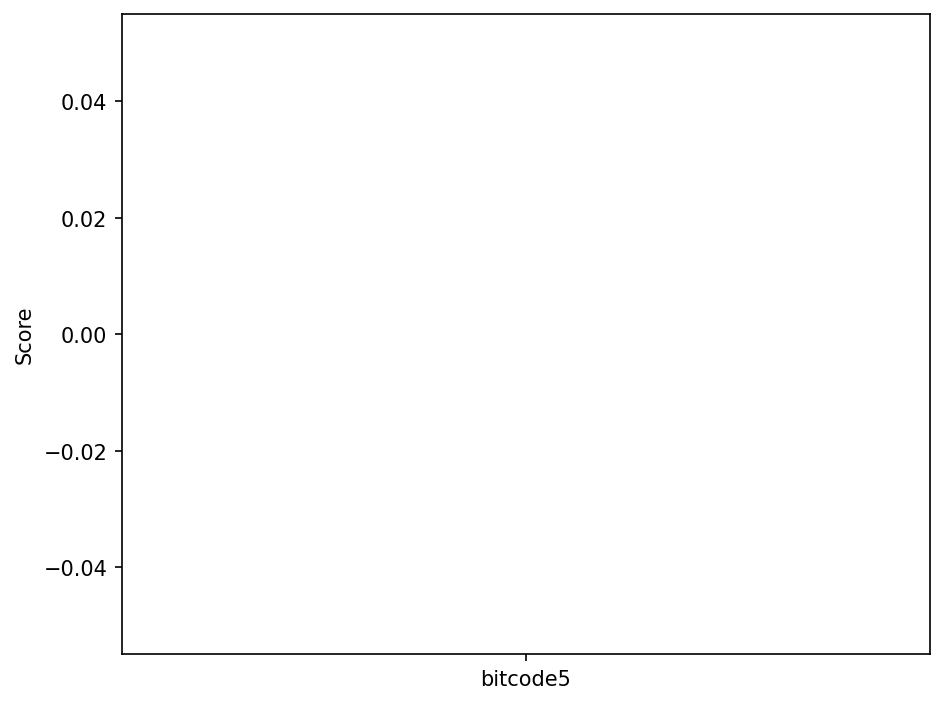

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


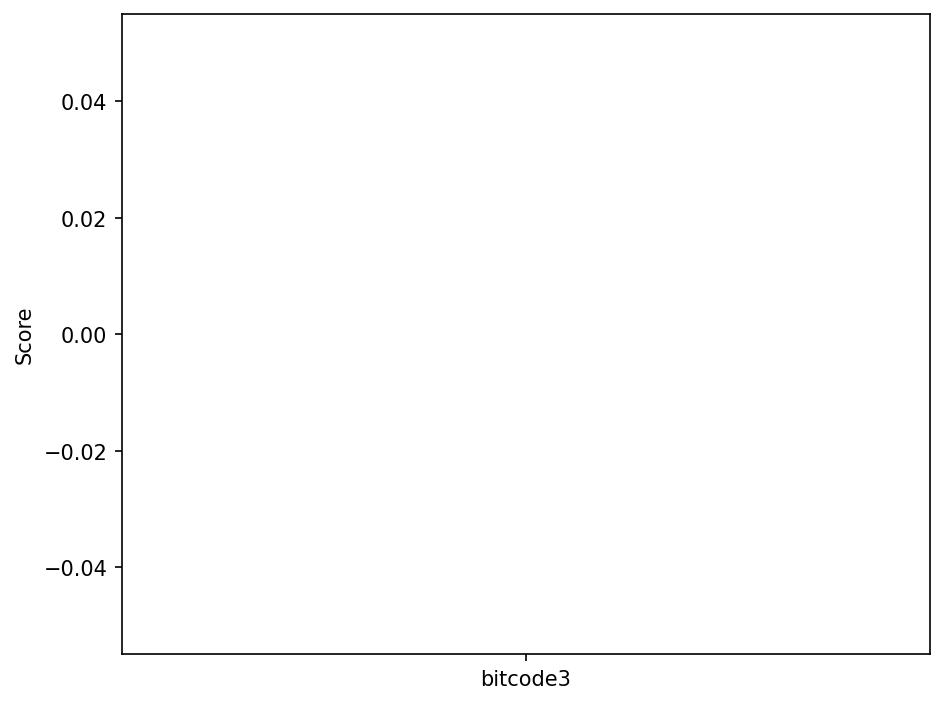

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


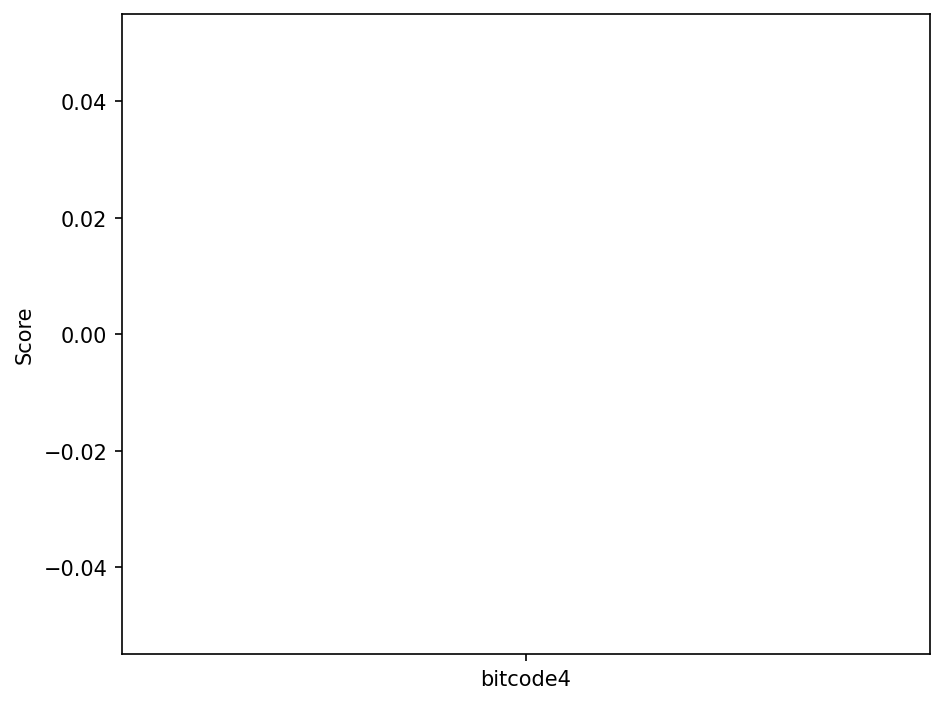

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


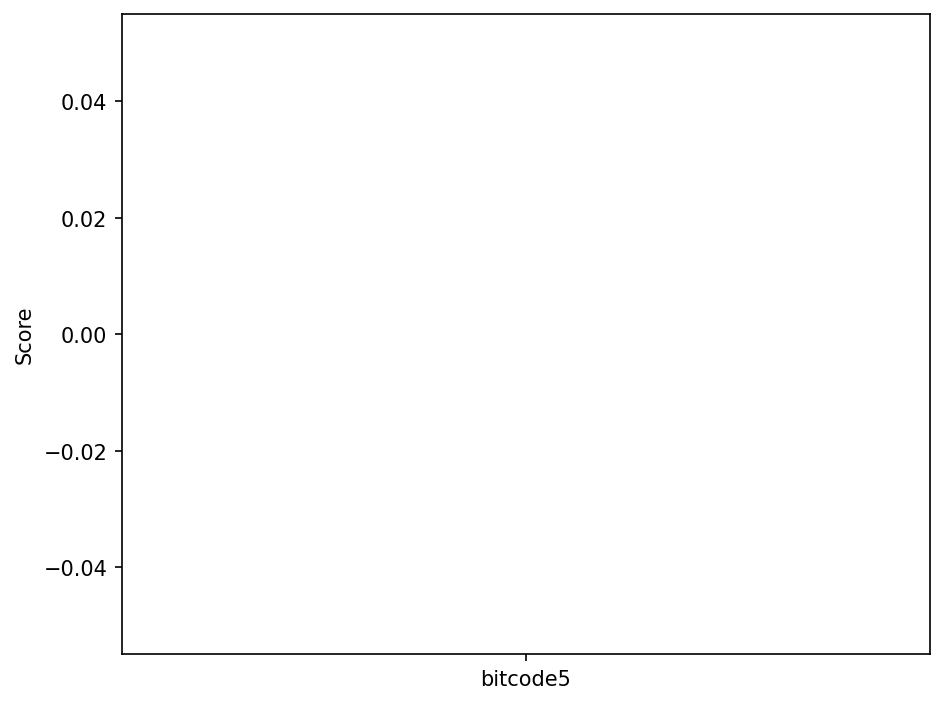

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


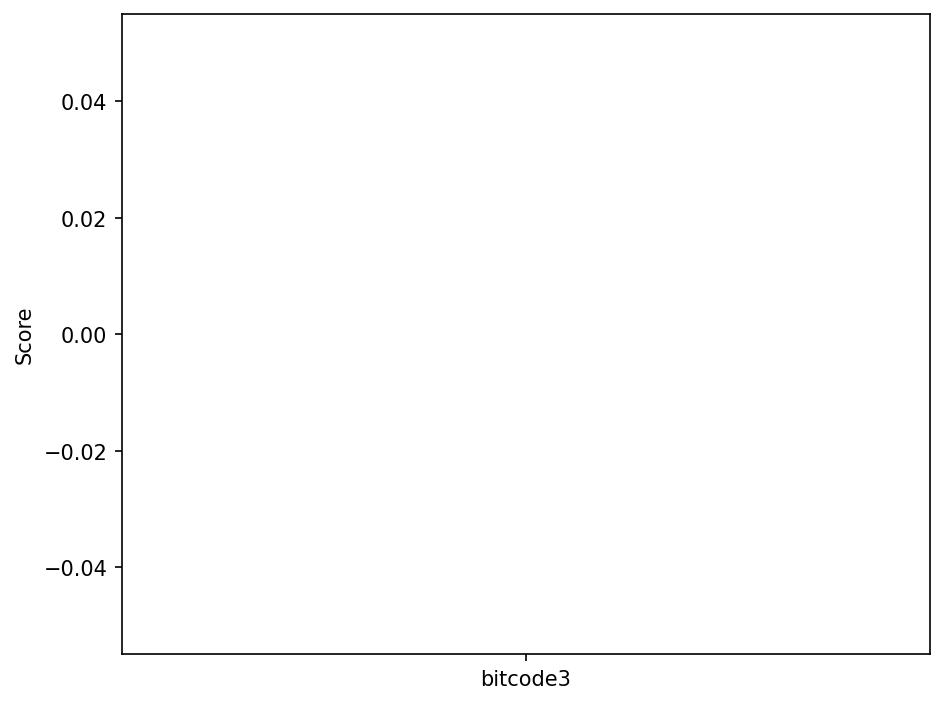

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


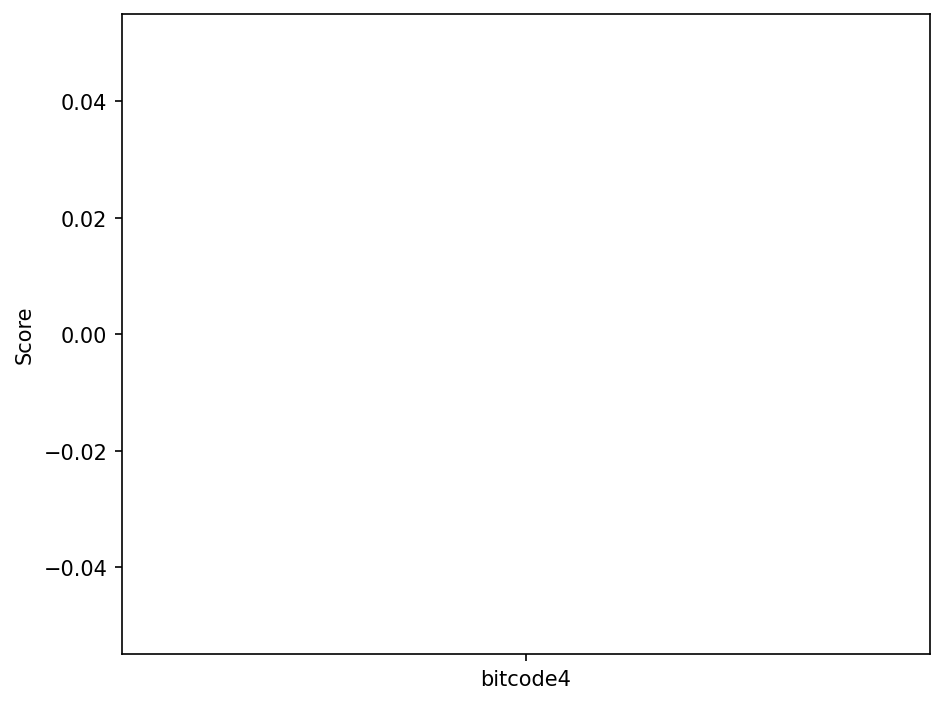

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


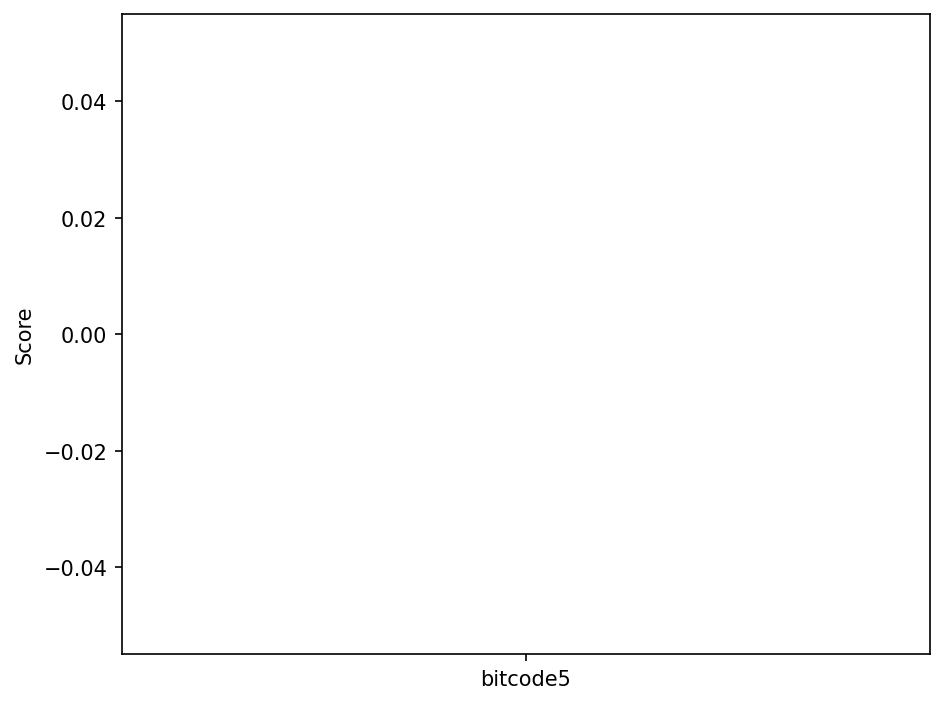

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


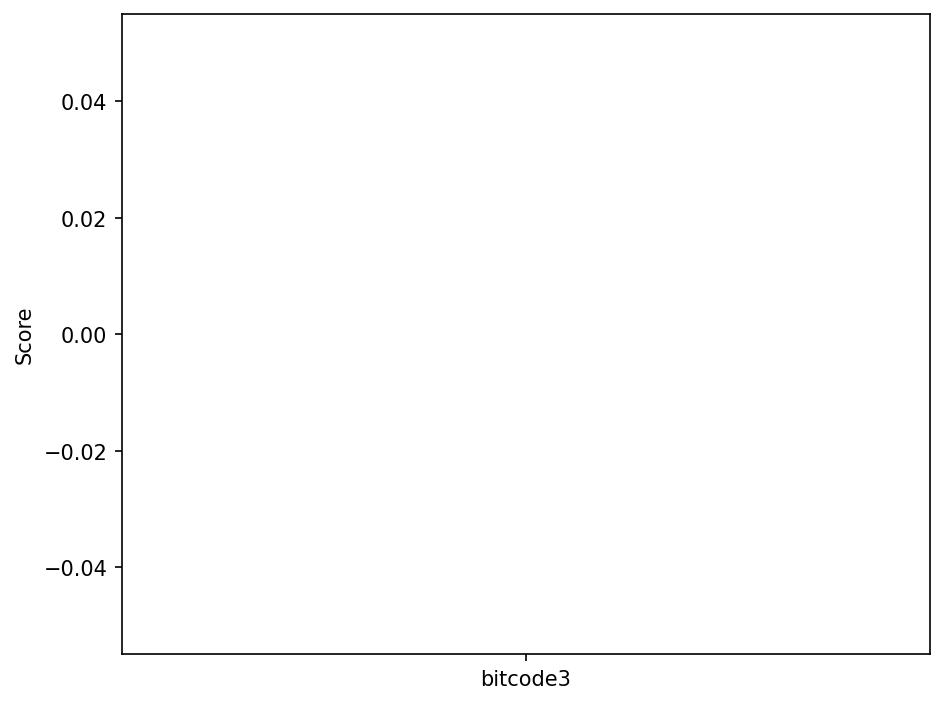

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


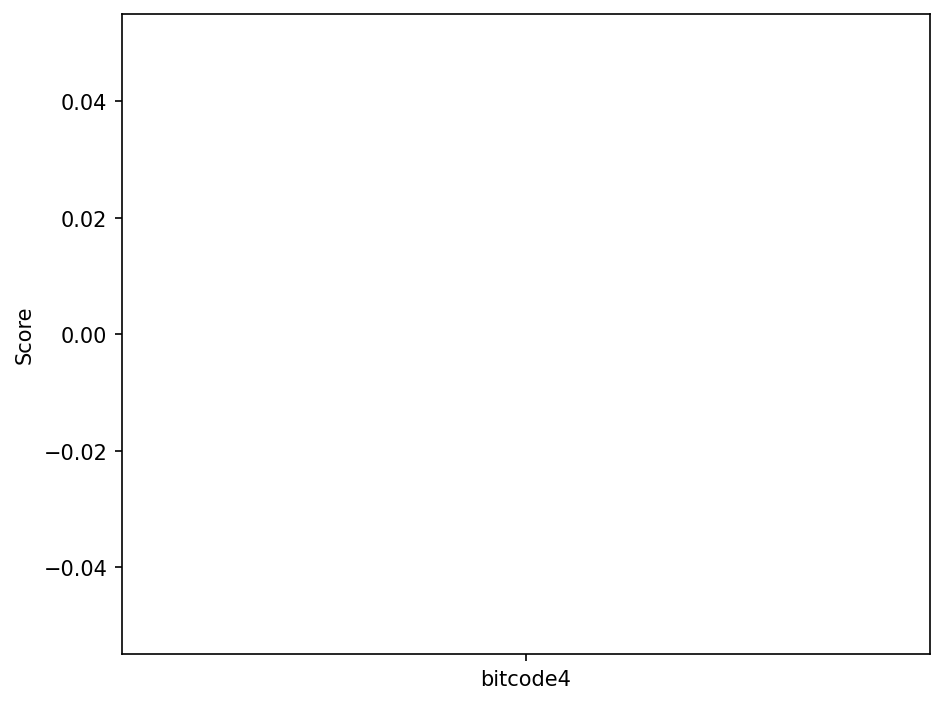

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


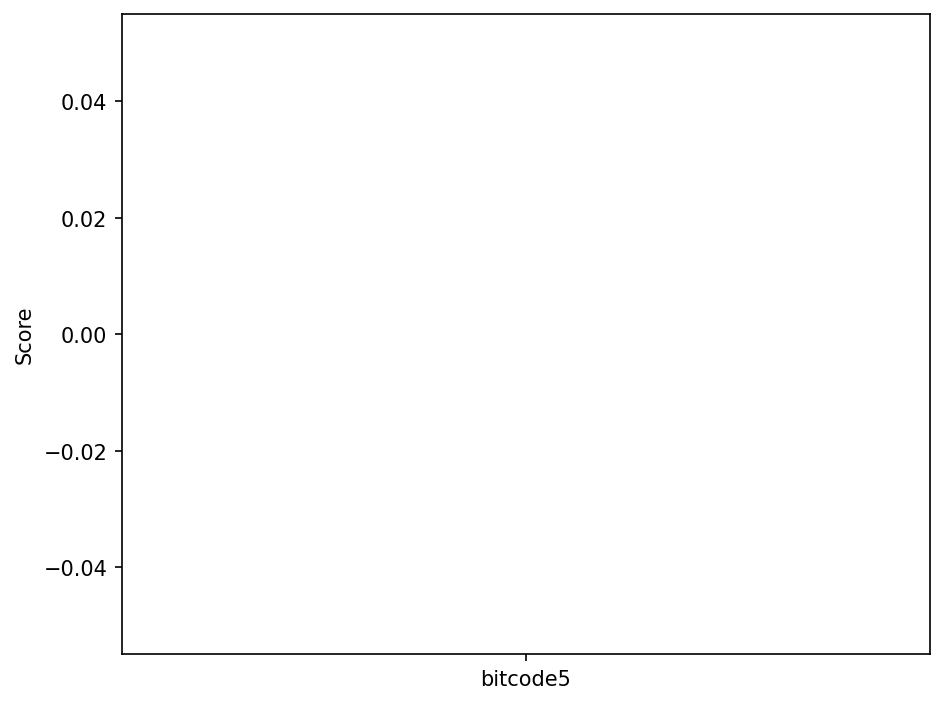

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

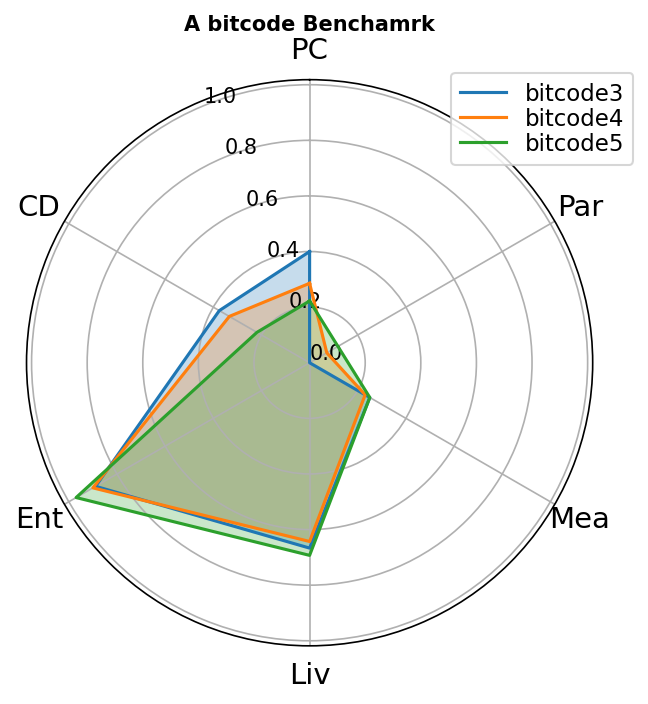

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        [X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

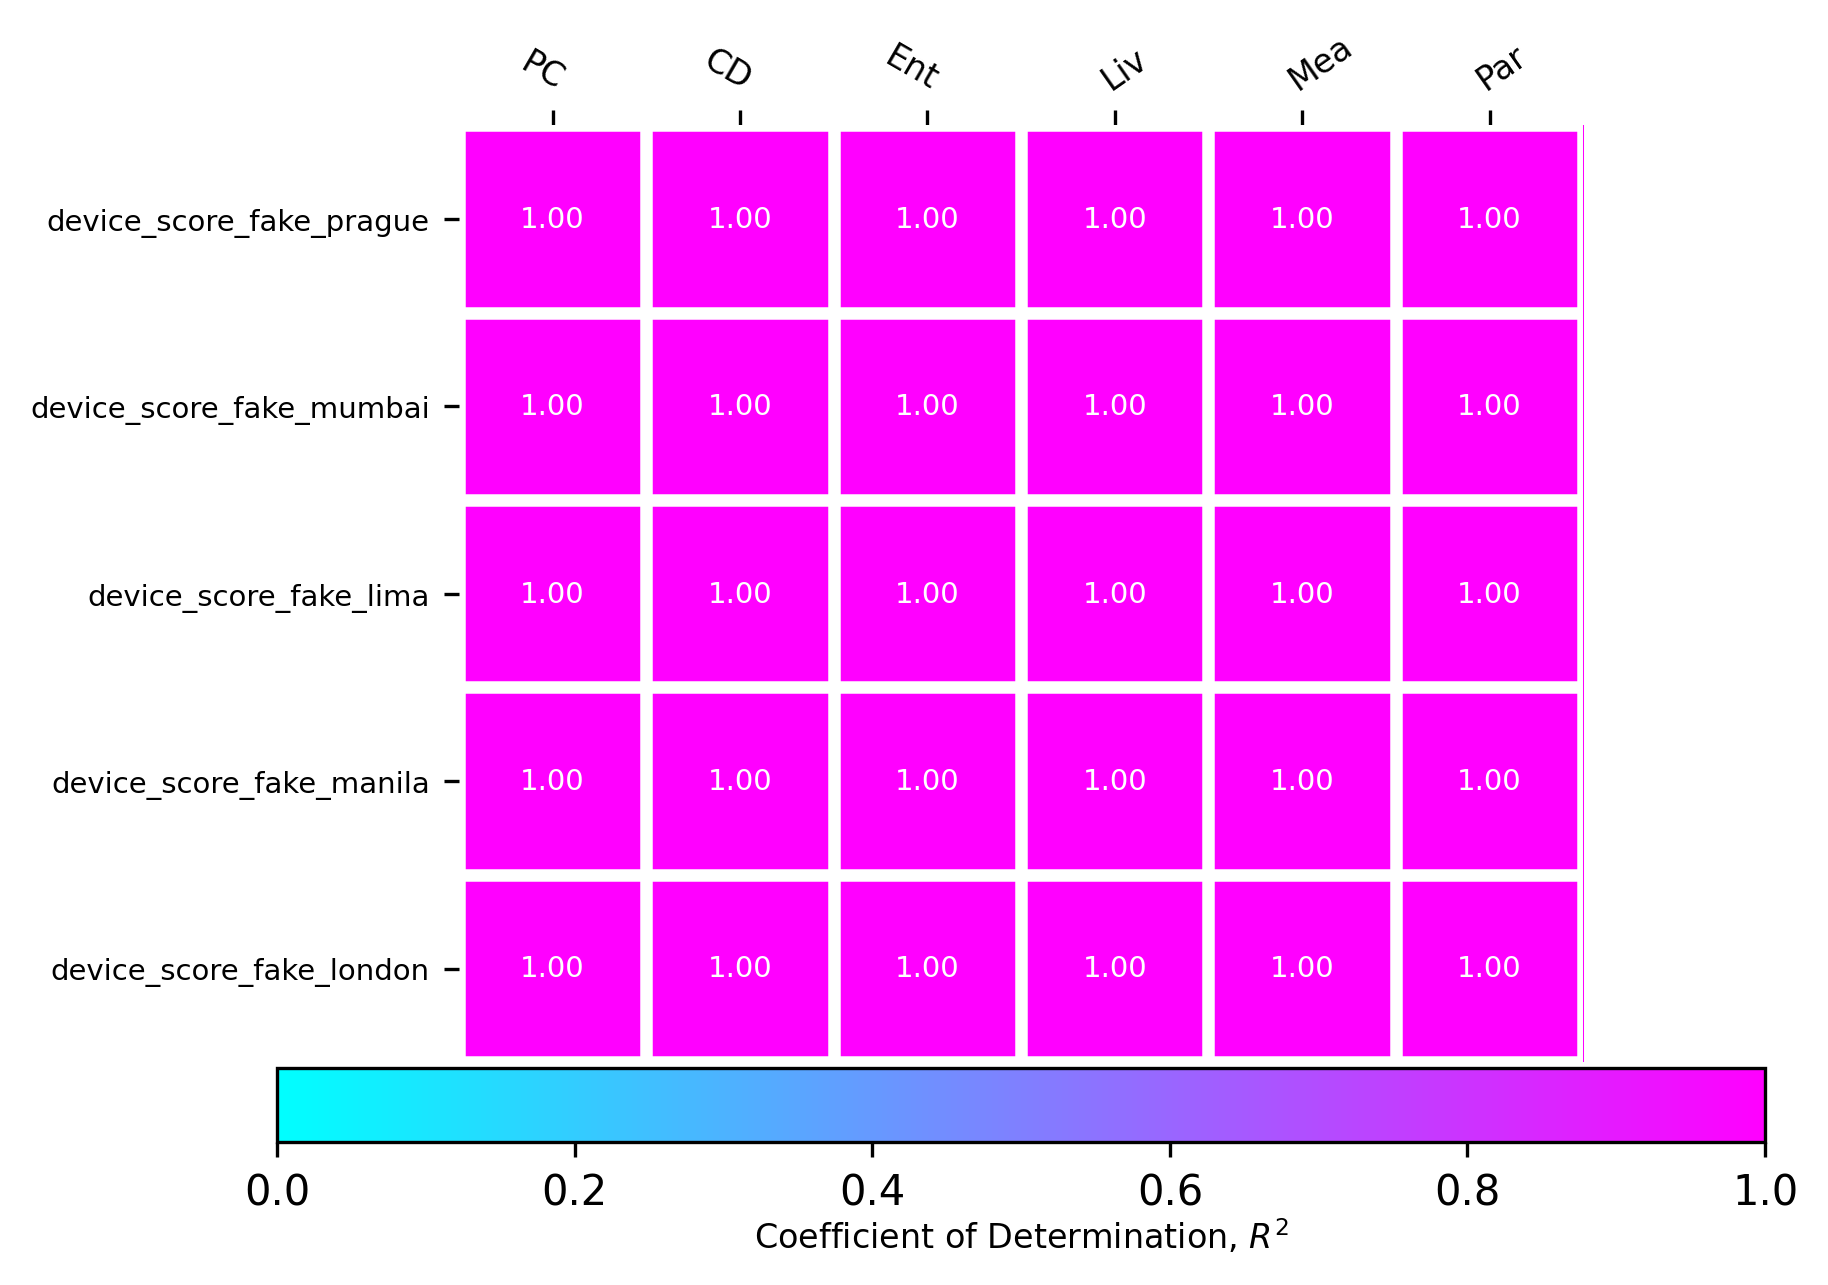

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

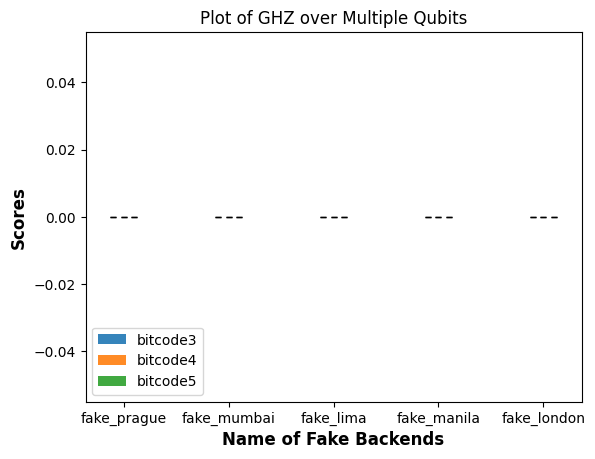

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()